### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [549]:
# loading data
df = pd.read_csv('SVM.csv')

In [551]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [553]:
# insigt of data
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [557]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [559]:
#Removing blank space from dataframe columns

df = df.rename(columns={' Mean of the integrated profile':'Mean of the integrated profile',
       ' Standard deviation of the integrated profile':'Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile':'Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile':'Skewness of the integrated profile', 
       ' Mean of the DM-SNR curve':'Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve':'Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve':'Excess kurtosis of the DM-SNR curve', 
       ' Skewness of the DM-SNR curve':'Skewness of the DM-SNR curve',
})

## Checking Missing Values

In [562]:
df.isna().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       2502
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1702
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     869
target_class                                    5370
dtype: int64

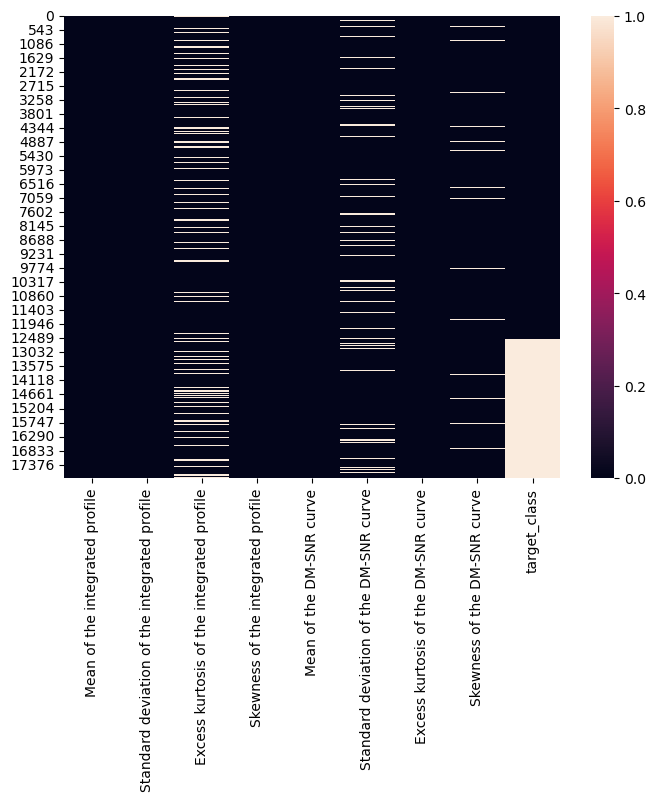

In [564]:
# ploting missing values heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=df.isna())
plt.show()

In [566]:
# Filling Missing values in dataset
for col in df.columns:
    mean_col = df[col].mean()
    for row in range(len(df[col])):
        if pd.isna(df.loc[row, col]):
            df.loc[row, col] = mean_col

## Data Visualization

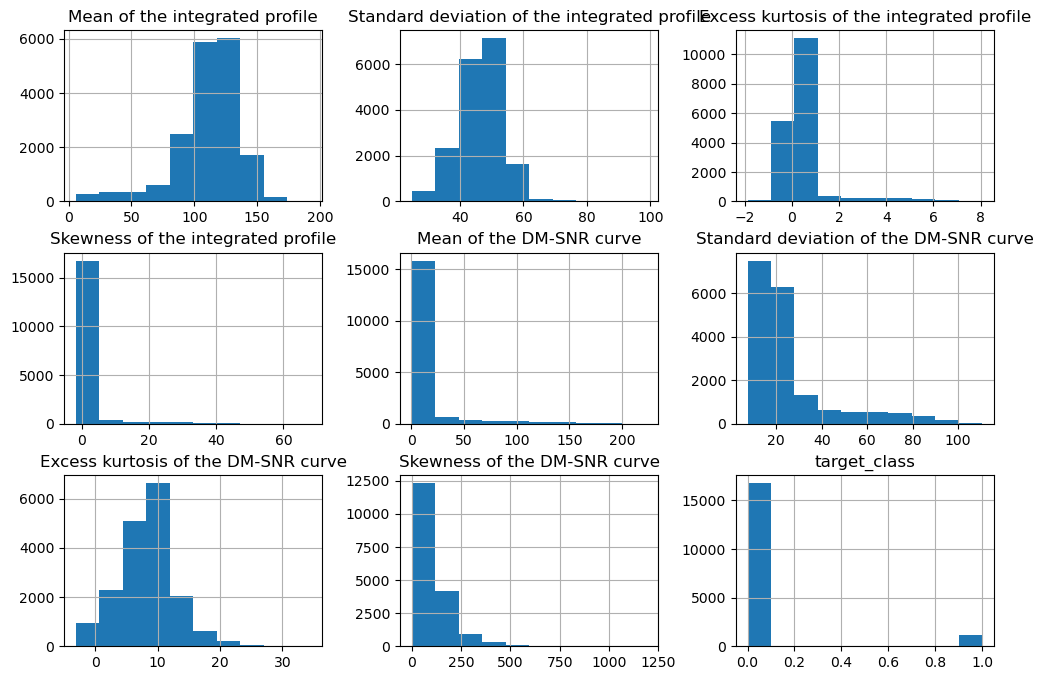

In [568]:
#ploting histogram
df.hist(figsize=(12, 8))
plt.show()

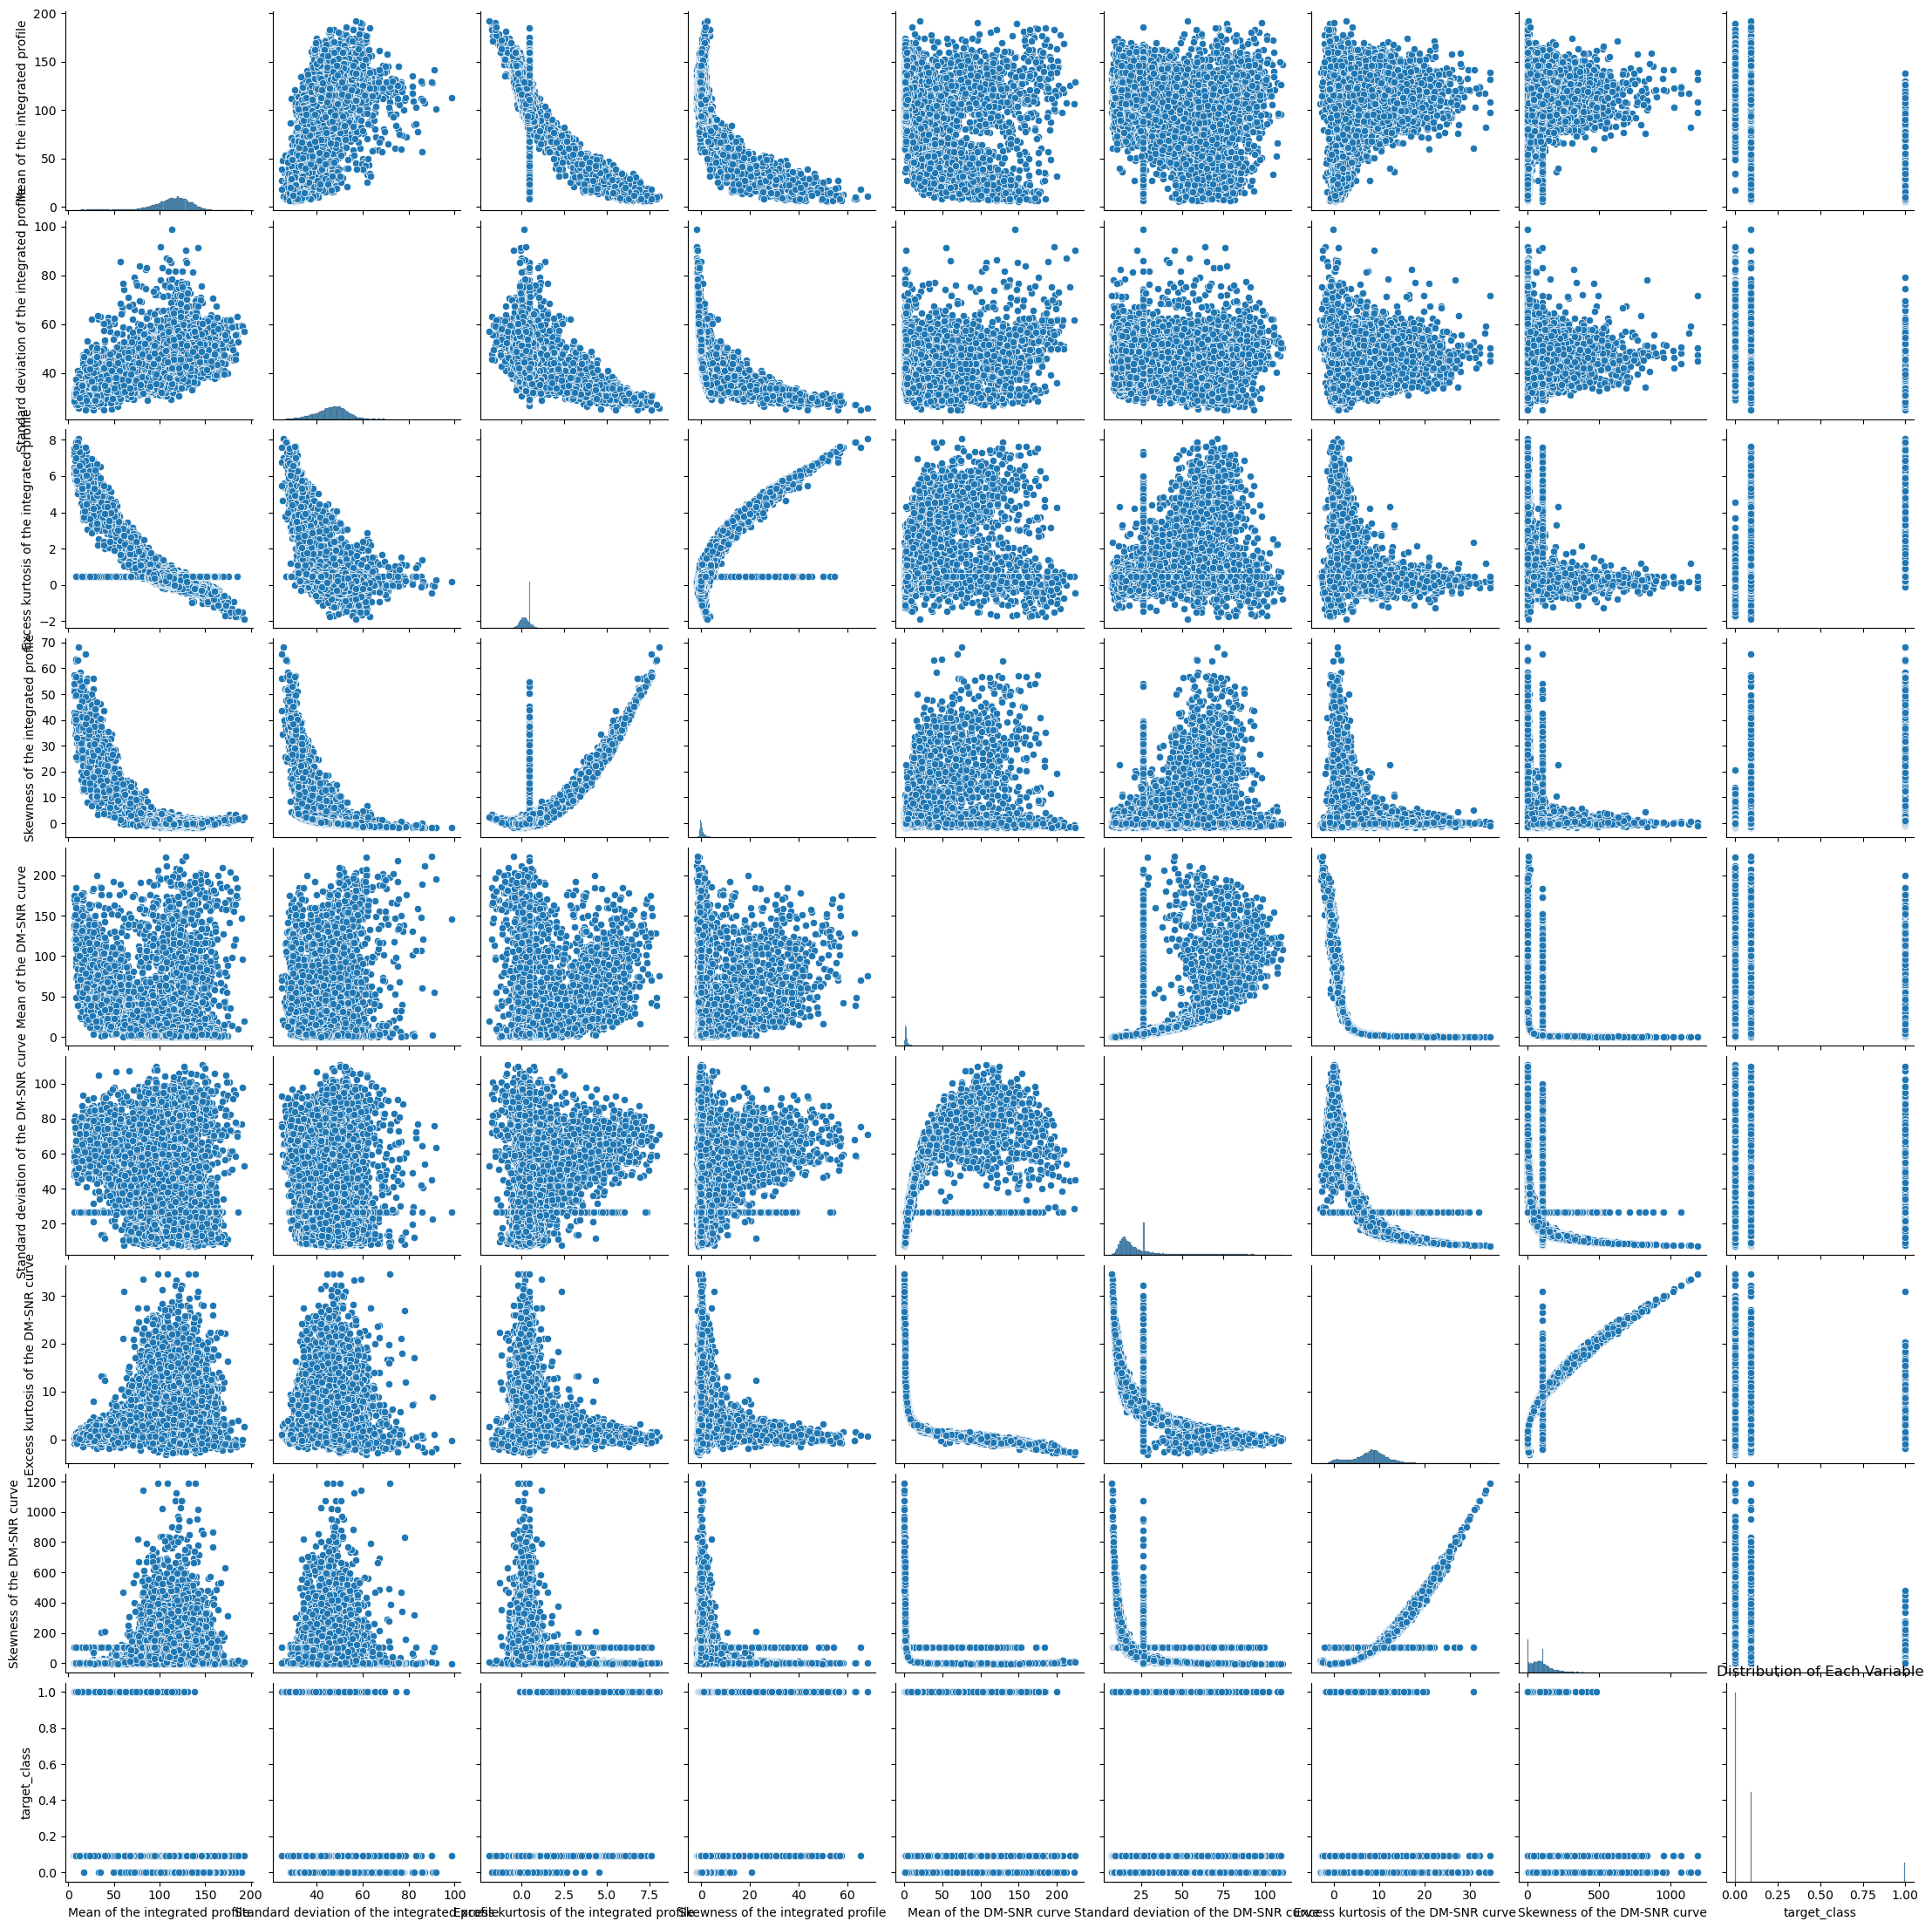

In [514]:
#pairplot 
sns.pairplot(data=df)
plt.title('Distribution of Each Variable')
plt.show()

## Outliers

# Ploting Outliers with boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

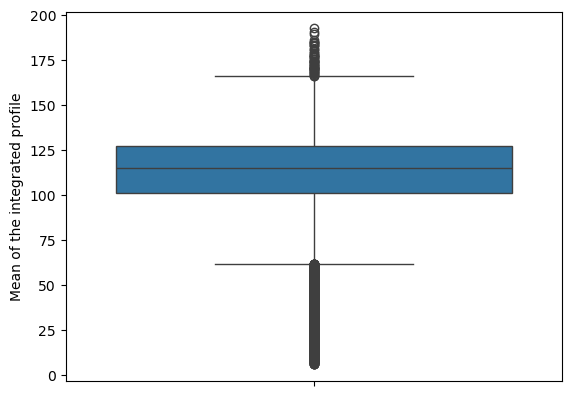

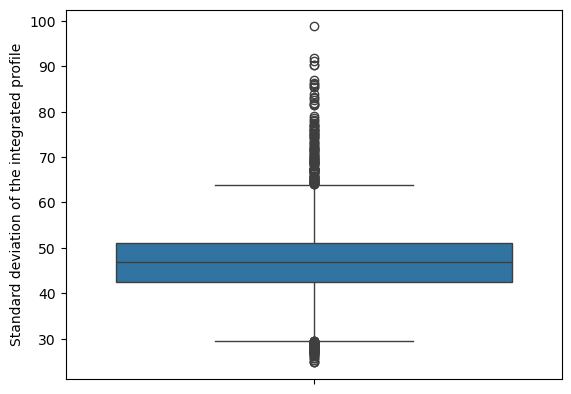

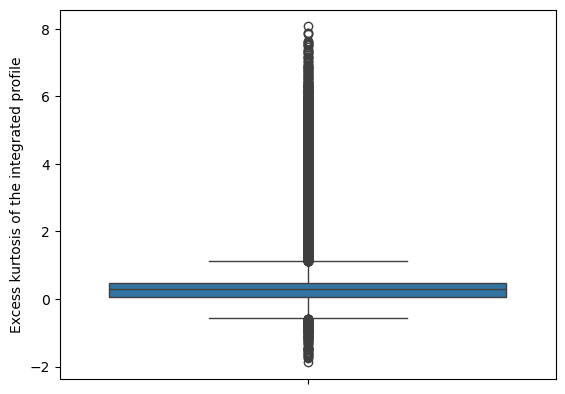

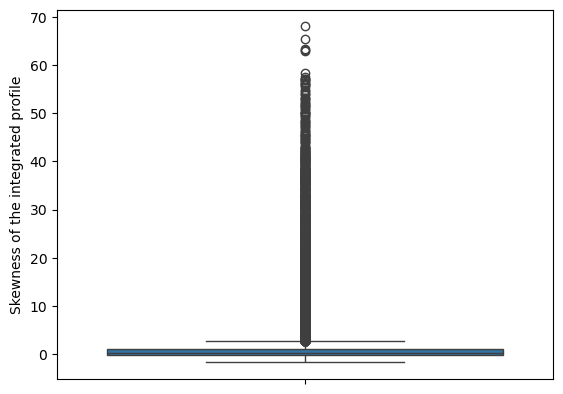

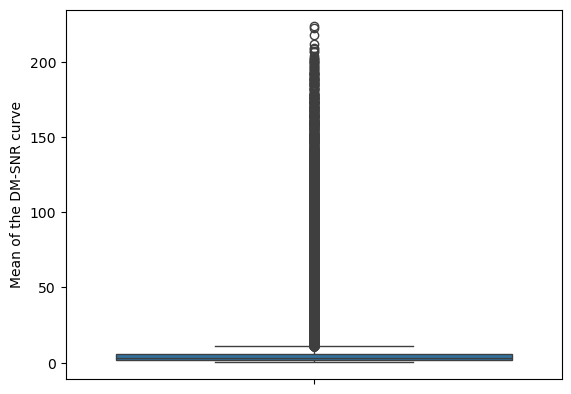

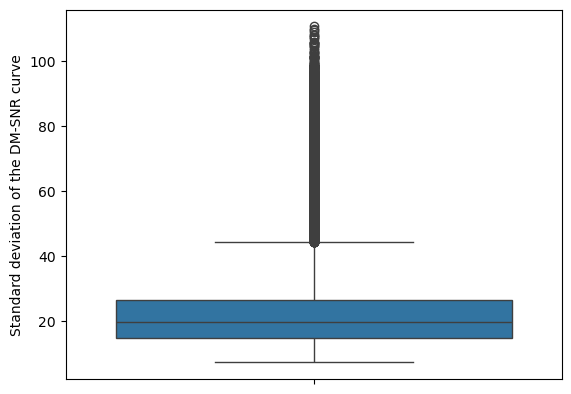

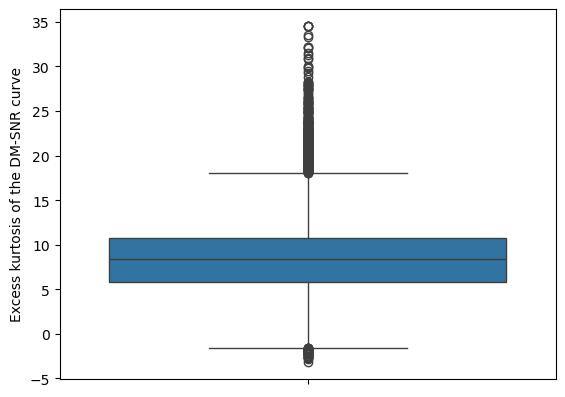

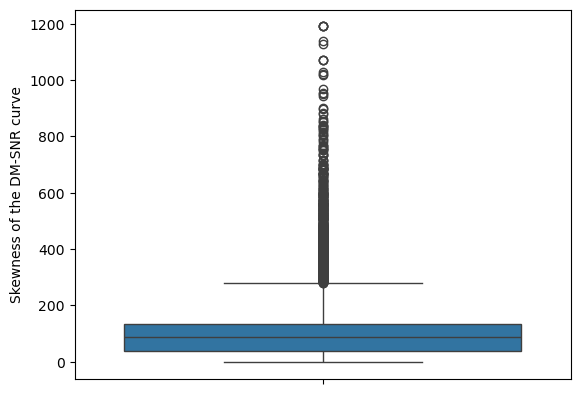

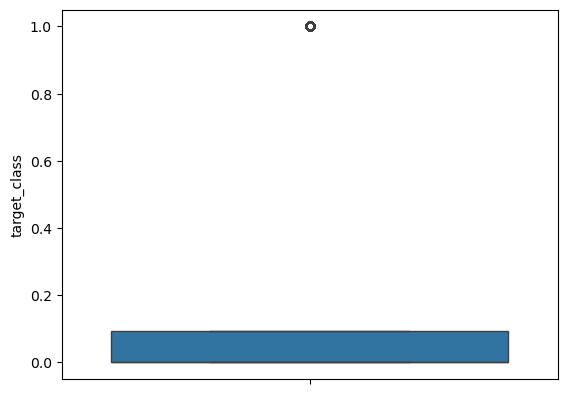

In [570]:
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.show()

In [572]:
#Checking Outliers
def outlier_lims(col):
    q3, q1 = np.percentile(col, [75, 25])
    iqr = q3-q1
    upper_lims = q3 + 1.5*iqr
    lower_lims = q1 - 1.5*iqr
    return upper_lims, lower_lims

In [574]:
for col in df.columns:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: Mean of the integrated profile
Upper Limit = 166.3203125
Lower Limit = 61.6953125
Percentage of Outliers= 5.754832942228181
-------------------------------------------------- 

--------------------------------------------------
Column: Standard deviation of the integrated profile
Upper Limit = 63.993978603749994
Lower Limit = 29.40524097375
Percentage of Outliers= 1.463850709576489
-------------------------------------------------- 

--------------------------------------------------
Column: Excess kurtosis of the integrated profile
Upper Limit = 1.1119892902934203
Lower Limit = -0.5730996341760523
Percentage of Outliers= 7.978545088836741
-------------------------------------------------- 

--------------------------------------------------
Column: Skewness of the integrated profile
Upper Limit = 2.6023152090000004
Lower Limit = -1.863103771
Percentage of Outliers= 10.621298469102692
-------------------------------------------

#### For Excess kurtosis of the DM-SNR curve and Standard deviation of the integrated profile, % of outliers is very low ==> can delete those records

#### Others columns have % of Outliers very high ==> can not delete those records

In [577]:
for col in ['Excess kurtosis of the DM-SNR curve', 'Standard deviation of the integrated profile']:
    UL, LL = outlier_lims(df[col])
    df.loc[df[col]<LL, col] = np.nan
    df.loc[df[col]>UL, col] = np.nan

df.dropna(subset=['Excess kurtosis of the DM-SNR curve', 'Standard deviation of the integrated profile'], inplace = True)
df.reset_index(drop = True, inplace = True)


## Feature Selaction

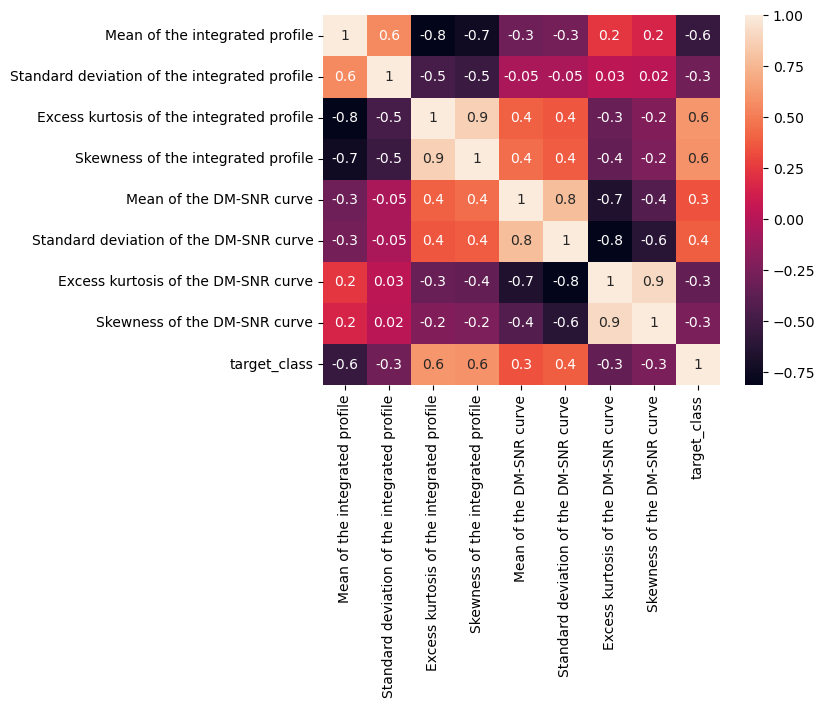

In [582]:
df_corr = df.corr()
sns.heatmap(data=df_corr, fmt='.1g',  annot=True)
plt.show()

Some columns should be removed from dataframe to avoid multicollinearity

1. Standard deviation of the DM-SNR curve have a correlation of 0.78
2. Excess kurtosis of the integrated profile have a correlation of 0.87.
3. Excess kurtosis of the DM-SNR curve have a correlation of 0.9.
4. Mean of the integrated profile have correlation of -0.81

In [585]:
# Drop highly correlated feature from the dataset to reduce redundancy
df.drop(columns=['Excess kurtosis of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the integrated profile', 'Mean of the integrated profile'], inplace=True)

In [587]:
data = df.copy()

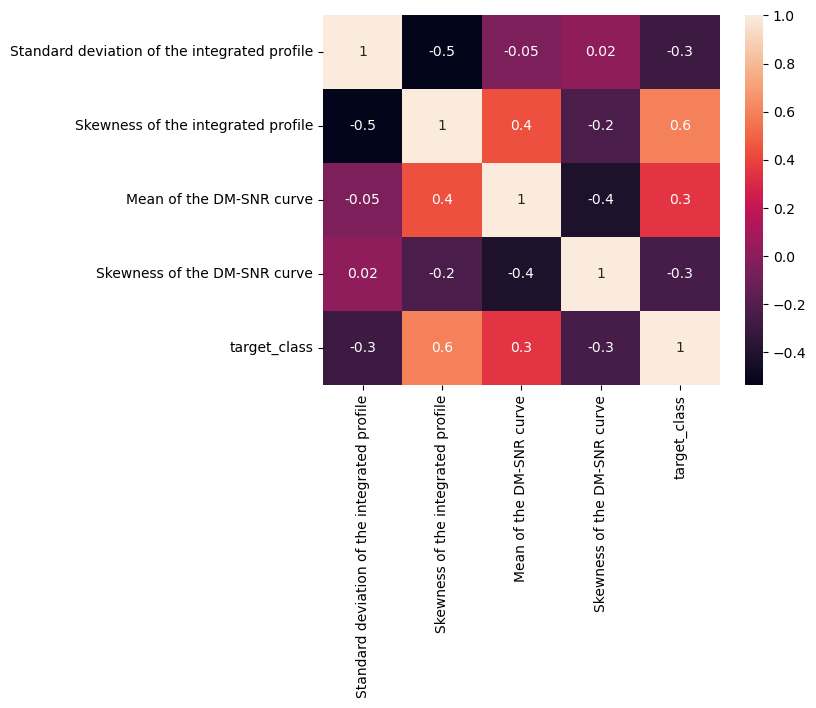

In [593]:
data_corr = data.corr()
sns.heatmap(data=data_corr, fmt='.1g', annot=True)
plt.show()

## Standerdisation and handle outliers

In [600]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)

scaled_array

array([[ 0.30371125, -0.29490859, -0.31461501, -0.39768408, -0.37595685],
       [-1.63084251,  0.3470254 , -0.3428727 ,  0.09449268, -0.37595685],
       [ 1.0739795 , -0.34851363, -0.33024888, -0.28143866, -0.37595685],
       ...,
       [ 0.39116749, -0.28049332, -0.32779169, -0.34226484,  0.01327098],
       [ 0.41364755, -0.26593516, -0.34539132,  0.06363168,  0.01327098],
       [-1.30140938,  0.02660794, -0.26811266, -0.73019743,  0.01327098]])

In [602]:
#converting array into dataframe
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)
scaled_df.head()

,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.303711,-0.294909,-0.314615,-0.397684,-0.375957
1,-1.630843,0.347025,-0.342873,0.094493,-0.375957
2,1.073980,-0.348514,-0.330249,-0.281439,-0.375957
3,0.381898,-0.324747,0.210794,-1.157122,-0.375957
4,-1.640025,0.325402,-0.328529,-0.251830,-0.375957


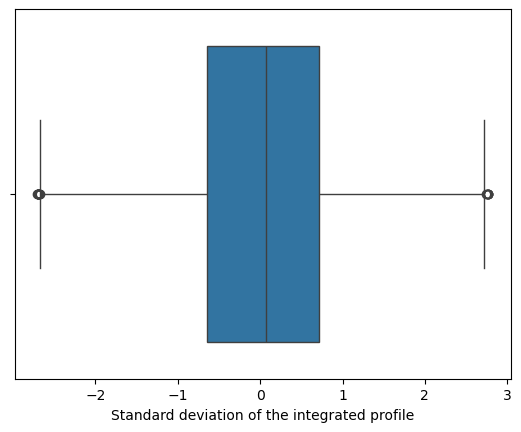

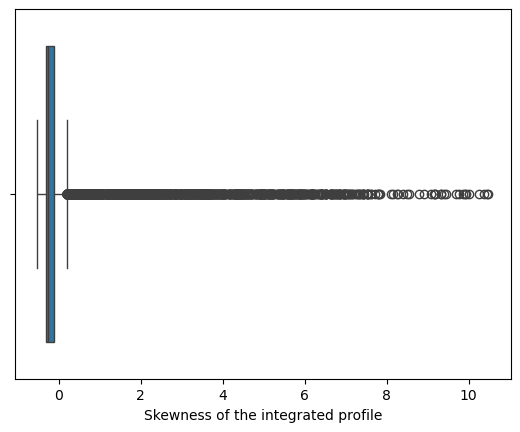

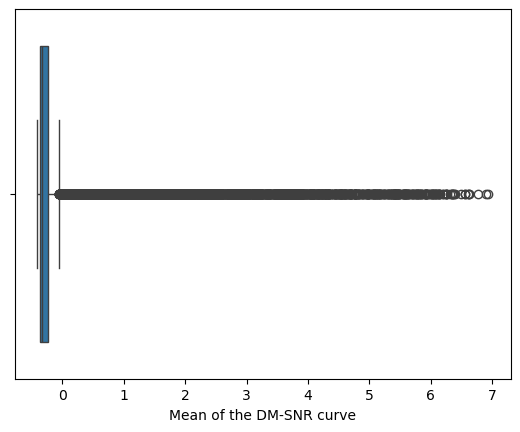

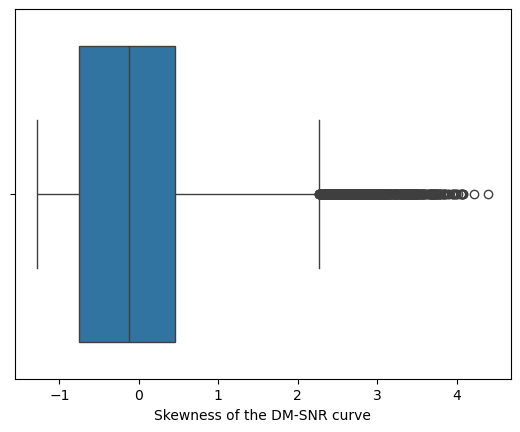

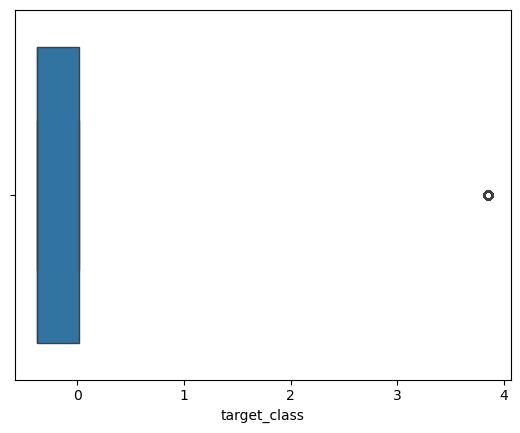

In [604]:
#ploting standardscaler outliers
#scaled_df.boxplot(figsize=(12, 8), rot=90)

for col in scaled_df.columns:
    sns.boxplot(data=scaled_df[col], orient='h')
    plt.show()

### Dropping Target_class Outliers beacause it can lead to result distortion 

In [606]:
abc = scaled_df.loc[scaled_df['target_class']>=3, 'target_class'].index
scaled_df.drop(index=abc, inplace=True)

## Train Test Split

In [609]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('target_class', axis=1)
y = scaled_df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [611]:
print("X_train Shape", X_train.shape)
print("y_train Shape", y_train.shape)
print("X_test Shape", X_test.shape)
print("y_test Shape", y_test.shape)

X_train Shape (12894, 4)
y_train Shape (12894,)
X_test Shape (3224, 4)
y_test Shape (3224,)


## Building Model

In [614]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Define SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Combine scaling and SVR into a pipeline
pipeline = make_pipeline(StandardScaler(), svr)

# Perform cross-validation with scoring suitable for regression
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the SVR model on the entire training set
pipeline.fit(X_train, y_train)

# Evaluate the model
print("Train Score (Negative MSE):", -np.mean(scores))
print("Test Score (R^2):", pipeline.score(X_test, y_test))


Train Score (Negative MSE): 0.0320072101702058
Test Score (R^2): 0.021769553168562994


## Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 0.2],
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", -grid_search.best_score_)
print("Test Score (R^2):", grid_search.score(X_test, y_test))
